##  Import modules

In [1]:
import numpy as np
import pandas as pd

import os
import  seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings

from Pneumonia_classification.train_model import epoch

warnings.filterwarnings('ignore')


## Load the dataset

In [7]:
paths = []
labels = []

for dirname, _, filenames in sorted(os.walk('data')):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1].split('.')[0].lower()
        labels.append(label)
print('Dataset is Loaded')

Dataset is Loaded


In [8]:
paths[:5]

['data\\toronto_emotional_speech_set_data\\OAF_Fear\\OAF_back_fear.wav',
 'data\\toronto_emotional_speech_set_data\\OAF_Fear\\OAF_bar_fear.wav',
 'data\\toronto_emotional_speech_set_data\\OAF_Fear\\OAF_base_fear.wav',
 'data\\toronto_emotional_speech_set_data\\OAF_Fear\\OAF_bath_fear.wav',
 'data\\toronto_emotional_speech_set_data\\OAF_Fear\\OAF_bean_fear.wav']

In [9]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [10]:
## Create a dataframe
df = pd.DataFrame({'speech': paths, 'label': labels})
df.head()


,speech,label
0,data\toronto_emotional_speech_set_data\OAF_Fea...,fear
1,data\toronto_emotional_speech_set_data\OAF_Fea...,fear
2,data\toronto_emotional_speech_set_data\OAF_Fea...,fear
3,data\toronto_emotional_speech_set_data\OAF_Fea...,fear
4,data\toronto_emotional_speech_set_data\OAF_Fea...,fear


In [11]:
df['label'].value_counts()

label
fear       800
ps         800
sad        800
angry      800
disgust    800
happy      800
neutral    800
Name: count, dtype: int64

## Exploratory data analysis


<Axes: xlabel='count', ylabel='label'>

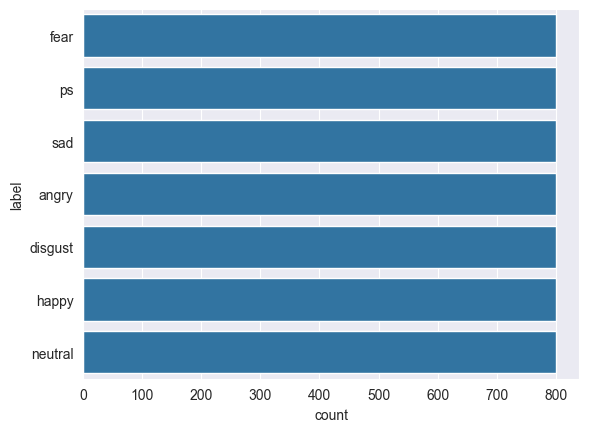

In [12]:
sns.countplot(df['label'])

In [20]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


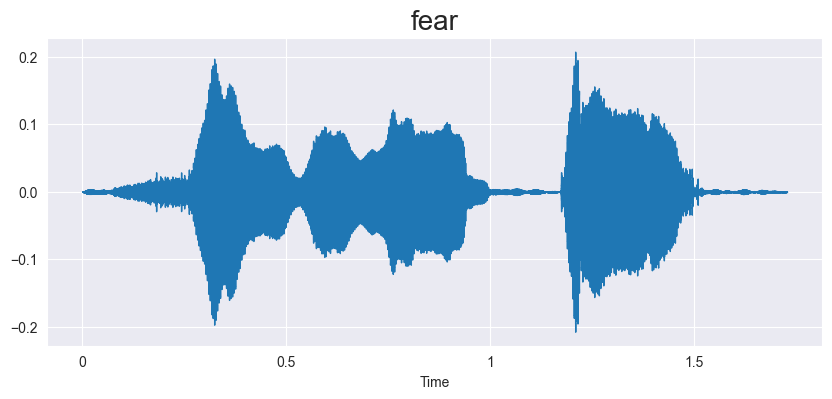

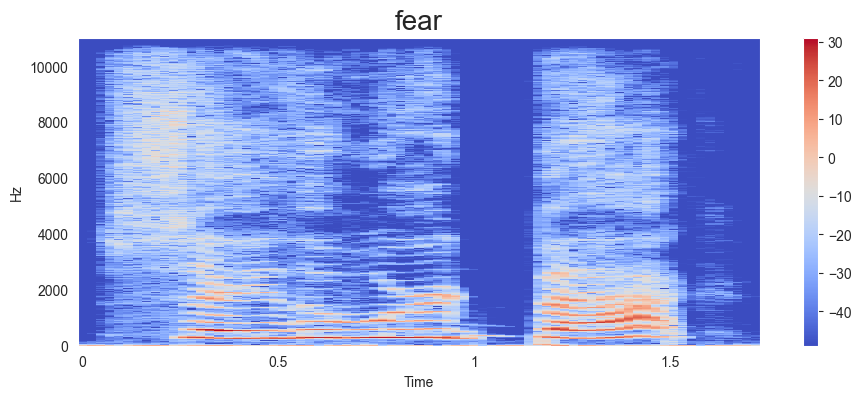

In [22]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

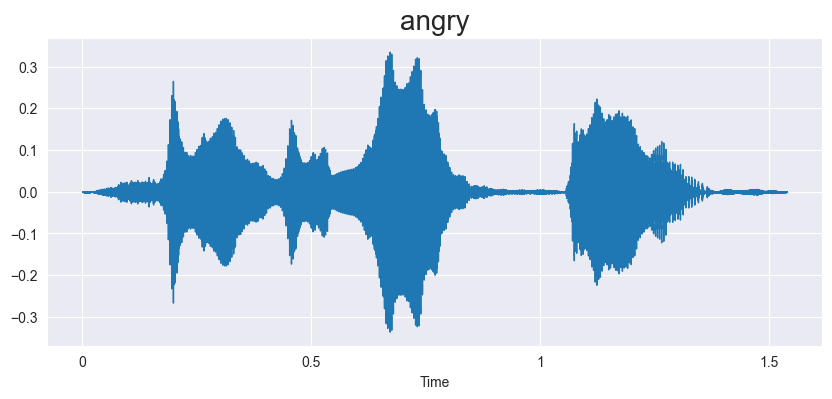

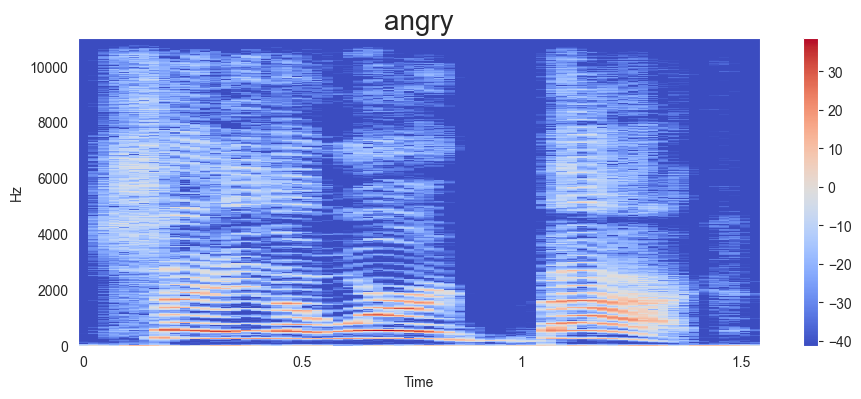

In [26]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

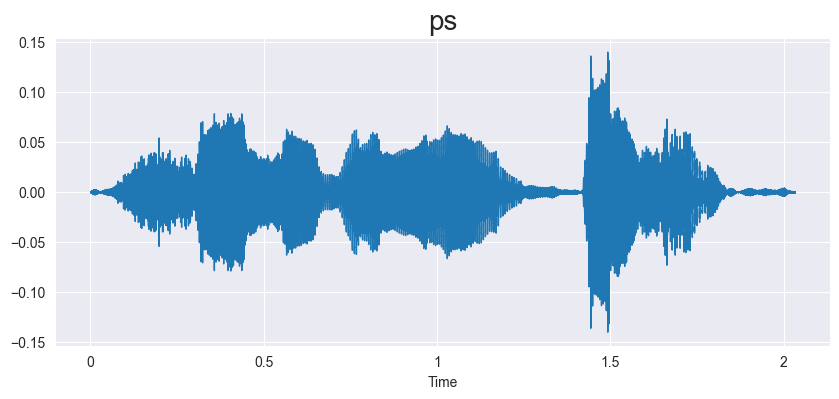

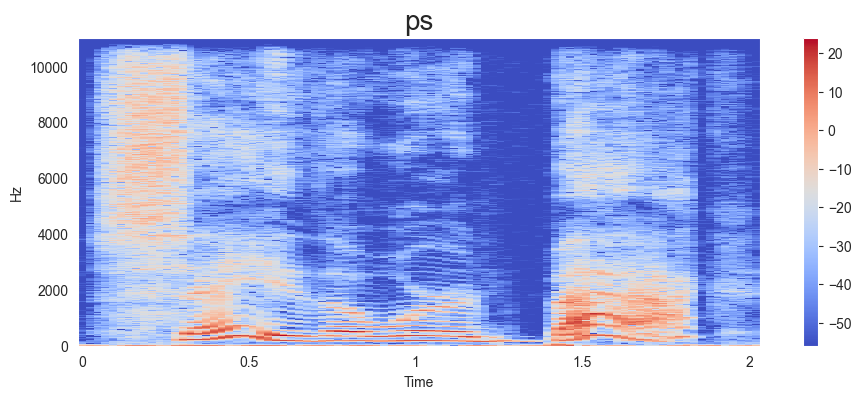

In [27]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

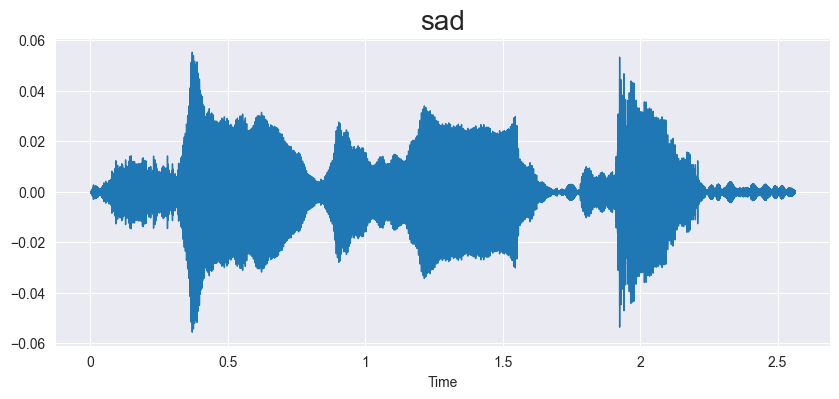

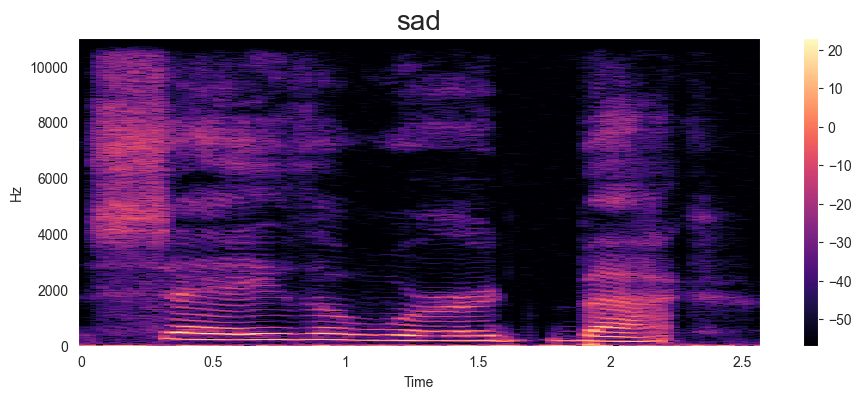

In [28]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

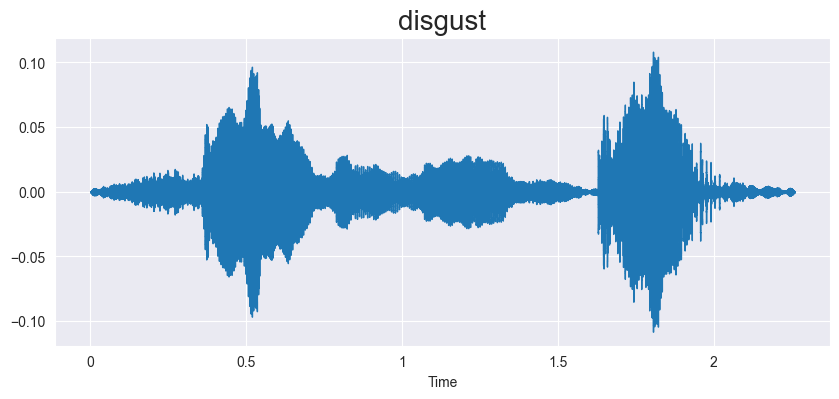

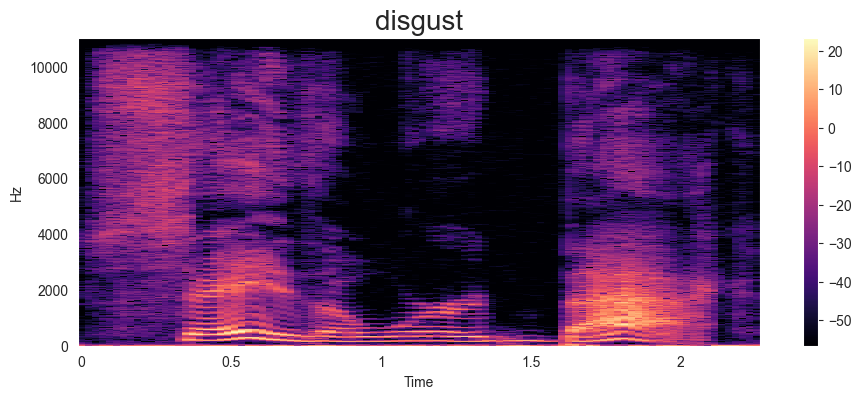

In [29]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

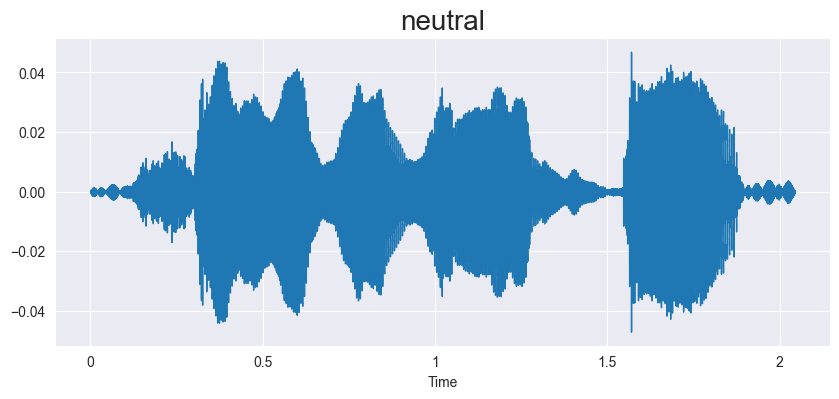

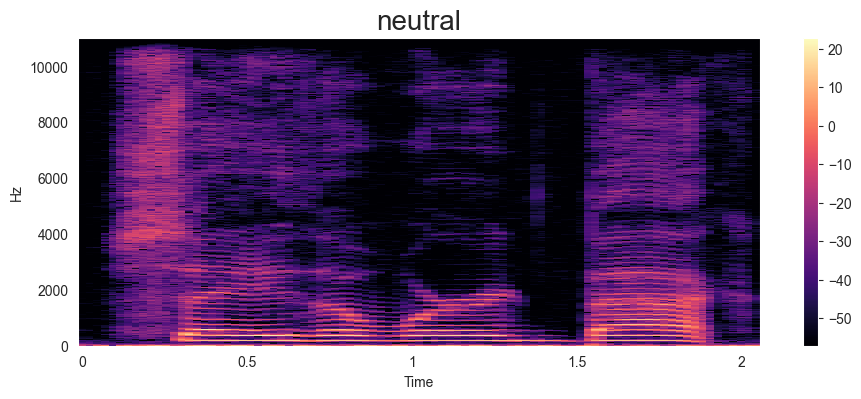

In [31]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

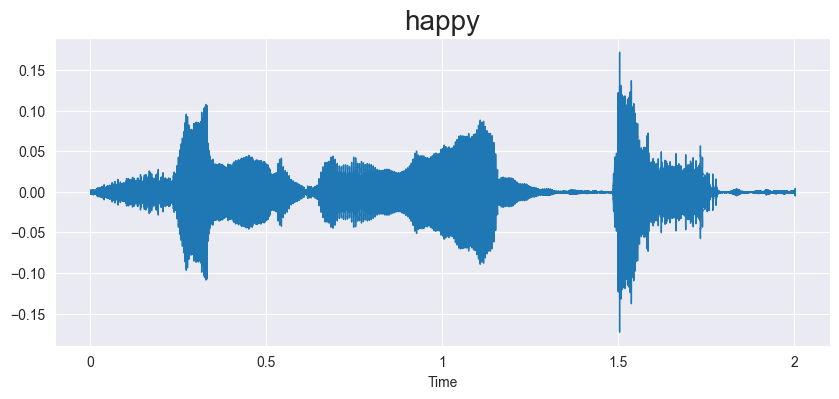

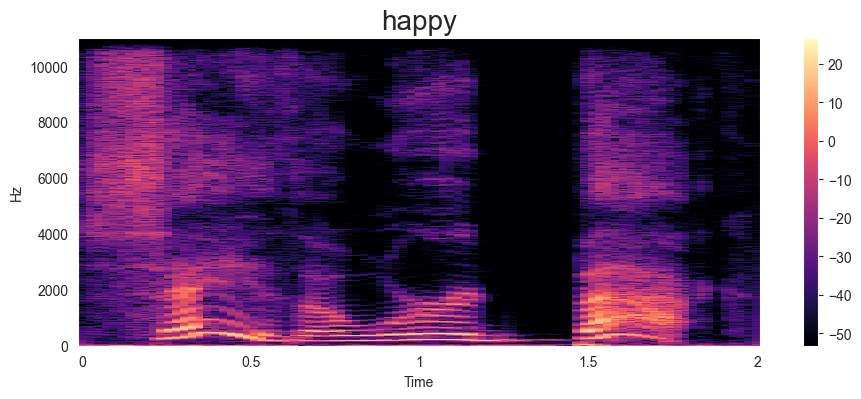

In [30]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature extraction

In [32]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc


In [33]:
extract_mfcc(df['speech'][0])

array([-4.45367371e+02,  9.12760925e+01, -5.89489102e-01, -1.73142662e+01,
        3.21145320e+00,  3.86890841e+00, -1.28565063e+01, -3.49924527e-02,
       -1.05142145e+01,  1.89630353e+00, -1.30049429e+01, -7.57585859e+00,
       -6.37614107e+00, -3.06715417e+00, -2.89668512e+00,  2.50142479e+00,
       -6.56667805e+00,  2.31609941e+00,  3.90024233e+00, -7.21221256e+00,
        6.13847685e+00,  1.85074539e+01,  1.52200947e+01,  2.95257893e+01,
        2.15466385e+01,  1.76312466e+01,  7.37704659e+00,  2.26086164e+00,
       -2.93547726e+00,  6.09860420e+00,  5.52886486e-01,  2.12438941e+00,
       -2.84072566e+00, -4.66247702e+00,  8.02074790e-01,  3.15331912e+00,
       -2.49664140e+00, -1.15182209e+00, -2.22408986e+00,  2.21104383e+00],
      dtype=float32)

In [34]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [35]:
X_mfcc

0       [-445.36737, 91.27609, -0.5894891, -17.314266,...
1       [-456.29837, 95.33351, 17.71685, -33.76581, -1...
2       [-461.2538, 56.51359, 13.97067, 2.5637875, 8.1...
3       [-412.7426, 85.44516, 7.658597, -21.482407, -0...
4       [-499.1559, 72.94782, 25.229706, 8.166261, 11....
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54756, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.906364, 28.373262, 39.577065, -...
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5600, dtype: object

In [47]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [48]:
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [50]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']])

In [57]:
y = y.toarray()

## Create the LSTModel

In [61]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.6962 - loss: 0.8307 - val_accuracy: 0.9241 - val_loss: 0.2736
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9243 - loss: 0.2359 - val_accuracy: 0.9830 - val_loss: 0.0659
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9493 - loss: 0.1591 - val_accuracy: 0.9375 - val_loss: 0.1986
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.9609 - loss: 0.1331 - val_accuracy: 0.9812 - val_loss: 0.0657
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9658 - loss: 0.1089 - val_accuracy: 0.9759 - val_loss: 0.0598
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.9721 - loss: 0.0828 - val_accuracy: 0.9893 - val_loss: 0.0256
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9721 - loss: 0.0920 - val_accuracy: 0.9920 - val_loss: 0.0209
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9741 - loss: 0.0822 - val_accuracy: 0.9937 - v

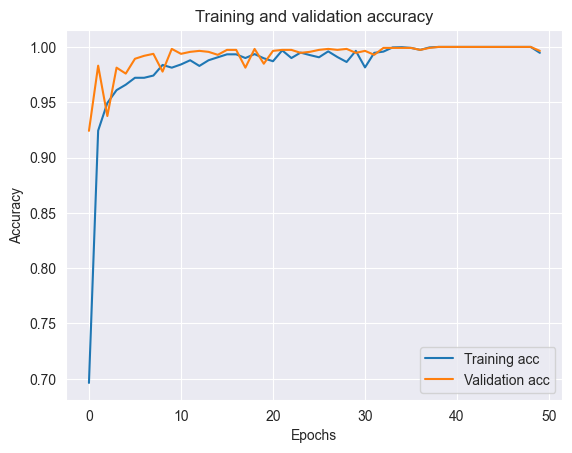

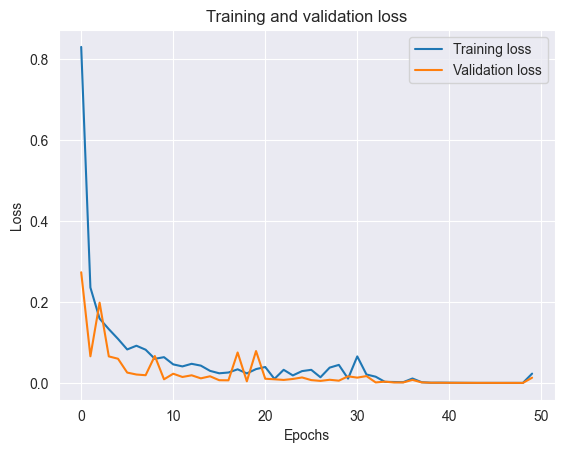

In [64]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.show()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation loss')
plt.show()

